# Assignment 4: Hough Transform

## Ex. 4.1 Detect lanes and eyes

* there are two datasets available: "images/eye_tracking" and "images/lane_detection" - decide for one of them

### Students:
Ekaterina Melnikova

Richard Theus

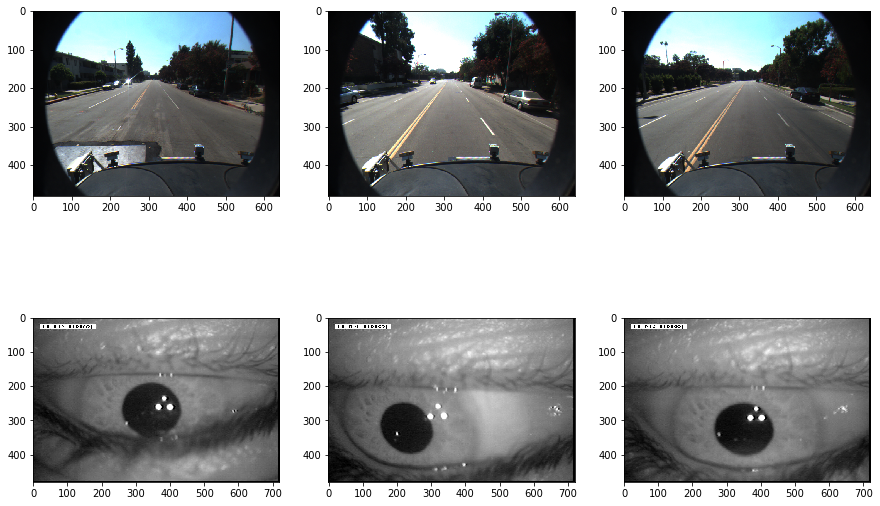

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00050.png')
lane3 = io.imread('images/lane_detection/f00090.png')

eye1 = io.imread('images/eye_tracking/0000.jpeg')
eye2 = io.imread('images/eye_tracking/0050.jpeg')
eye3 = io.imread('images/eye_tracking/0090.jpeg')

fig = plt.figure(figsize=(15, 10))
ax11 = plt.subplot(2, 3, 1)
ax12 = plt.subplot(2, 3, 2)
ax13 = plt.subplot(2, 3, 3)
ax21 = plt.subplot(2, 3, 4)
ax22 = plt.subplot(2, 3, 5)
ax23 = plt.subplot(2, 3, 6)



ax11.imshow(lane1)
ax12.imshow(lane2)
ax13.imshow(lane3)

ax21.imshow(eye1)
ax22.imshow(eye2)
ax23.imshow(eye3)

In [7]:
# dieser Code wurde als Musterlösung von Sebastian Oltmanns zur Verfügung gestellt und von Tim renoviert

%matplotlib inline
from skimage.draw import line
from skimage import io
import math
import numpy as np

def draw_line_hessian_normal(image, a, r):
    
    (dimy,dimx) = image.shape

    #r = x*cosa + y*sina

    # compute start and end point of line 
    x0 = 0
    y0 = round((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a)))
    x1 = dimx
    y1 = round((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a)))

    liney,linex = line(y0,x0,y1,x1)
    
    ret = np.copy(image)
    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1):
            ret[liney[yy],linex[yy]] = 1
    return ret

In [8]:
def draw_line_hessian_normal(image, a, r):
    
    (dimy,dimx) = image.shape
        
    x_max = image.shape[0]
    y_max = image.shape[1]
    diag_lenght = int(math.hypot(x_max, y_max))
    r = (r - diag_lenght) * -1
    a = a * -1

    # compute start and end point of line 
    x0 = 0
    y0 = int(round((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a))))
    x1 = dimx
    y1 = int(round((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a))))

    linex,liney = line(y0,x0,y1,x1)
    
    ret = np.copy(image)

    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1) and (linex[yy] > 0) and (linex[yy] < dimx-1):
            ret[liney[yy],linex[yy]] = 255
    return ret

* use a Canny edge detector to produce edge images for the sequence of images

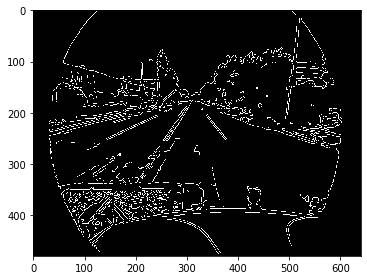

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
im = color.rgb2hsv(lane1)[:,:,2]
edges = feature.canny(im)
io.imshow(edges, cmap=plt.cm.gray)

* implement the classical Hough Transform for lines (for lane detection) as shown in the lecture

In [18]:
# case 1: self-made Hough Transform
def hough_transform(edges,step_size=1):
    rmax = int(edges.shape[0]*np.cos(math.radians(90))+ edges.shape[1]*np.sin(math.radians(90)))
    a = np.zeros((2*rmax, 181))
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i][j] == True:
                for theta in range(-90, 90, step_size):
                    r = int(i*np.cos(math.radians(theta)) + j*np.sin(math.radians(theta)))
                    rs = rmax - r
                    thetas = 90 - theta
                    a[rs][thetas] += 1
    return a
a = hough_transform(edges)
rmax = int(edges.shape[0]*np.cos(math.radians(90))+ edges.shape[1]*np.sin(math.radians(90)))

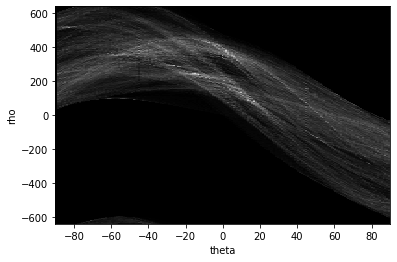

In [13]:
#self-made a
plt.imshow(a, aspect='auto', extent=[-90, 90, -rmax, rmax], cmap='gray')
plt.xlabel('theta')
plt.ylabel('rho')
plt.show()

In [14]:
# case 2: using skimage
from skimage.transform import hough_line
tested_angles = np.linspace(-np.pi/2, np.pi/2, 360)
a, theta, r = hough_line(edges, theta=tested_angles)

C:\Users\prol-\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


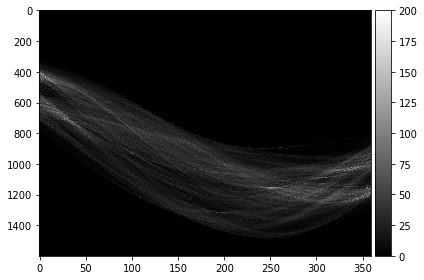

In [15]:
# a from skimage
io.imshow(a, aspect='auto', cmap=plt.cm.gray)

## OPTION 1: line detection for lane detection 

* use your implementation of the Hough Transform to find the 10 strongest lines in the image

In [19]:
def show_accumulator(edges, a, n_lines):
    image = np.zeros((edges.shape))
    for l in range(n_lines):
        i, j = np.where(a == a.max())
        if (90 - int(j[0]) != 0) and (rmax - int(i[0]) != 0):
            image = draw_line_hessian_normal(image, 90 - int(j[0]), rmax - int(i[0]))
        a[i,j] = 0
    return image

* display your result set (draw those lines on the image) (**RESULT**)

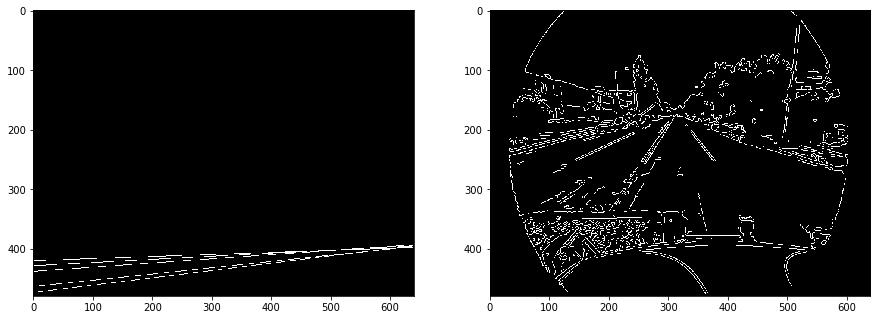

In [20]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax1.imshow(show_accumulator(edges, a, 10), cmap=plt.cm.gray)
ax2 = plt.subplot(1, 2, 2)
ax2.imshow(edges, cmap=plt.cm.gray)

* can you improve the performance by limiting the space of solutions? implement and draw lines again! (**BONUS**)

In [21]:
import random
def threshold(edges, t=0.5):
    new_edges = edges.copy()
    for x in range(len(edges)):
        for y in range(len(edges[x])):
            rand = random.random()
            if rand<t:
                new_edges[x][y]=0
    return new_edges

def probabilistic_hough_transform(edges, step_size=1):
    return hough_transform(threshold(edges), step_size)

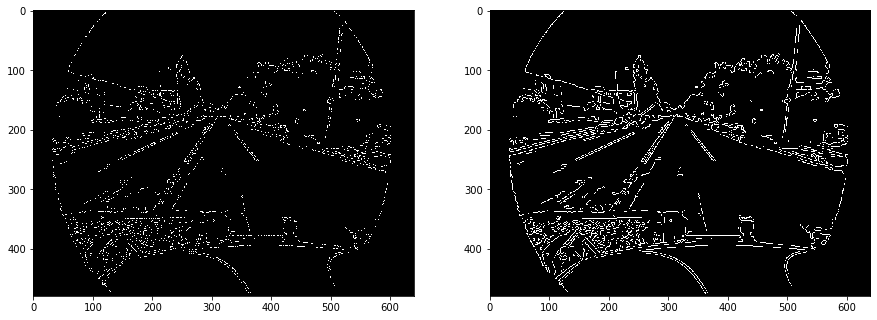

In [22]:
new_edges = threshold(edges)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax1.imshow(new_edges, cmap=plt.cm.gray)
ax2 = plt.subplot(1, 2, 2)
ax2.imshow(edges, cmap=plt.cm.gray)

In [23]:
new_a = probabilistic_hough_transform(edges, step_size=2)

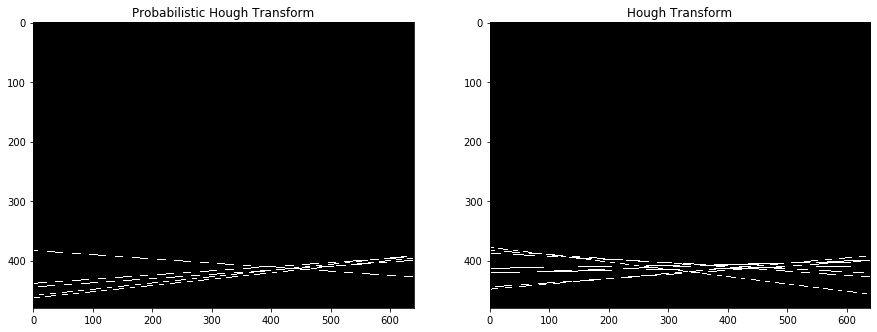

In [24]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax1.imshow(show_accumulator(new_edges, new_a, 10), cmap=plt.cm.gray)
ax1.title.set_text('Probabilistic Hough Transform')
ax2 = plt.subplot(1, 2, 2)
ax2.title.set_text('Hough Transform')
ax2.imshow(show_accumulator(edges, a, 10), cmap=plt.cm.gray)

Es ist definitiv schneller und das ergebnis ist ähnlich, aber nicht gleich.

# Ex. 4.2 Generalized Hough Transform

* implement the Generalized Hough Transform as described in the lecture for localizing a given template
* find the given template (see below) and mark its location in the image "animals.png" (**RESULT**)

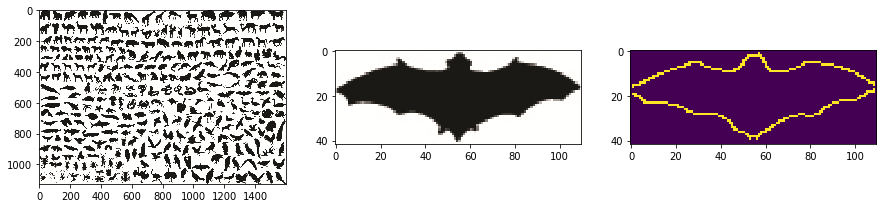

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

animals = io.imread('images/animals.png')

xmin = 1271
xmax = 1381
ymin = 519
ymax = 561

bat = animals[ymin:ymax, xmin:xmax]
bat_edge = feature.canny(color.rgb2gray(bat), 2)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(animals)
ax2.imshow(bat)
ax3.imshow(bat_edge)

In [26]:
from scipy.ndimage.filters import sobel
def gradient_orientation(image):
    dx = sobel(image, axis=0, mode='constant')
    dy = sobel(image, axis=1, mode='constant')
    gradient = np.arctan2(dy,dx) * 180 / np.pi
    gradient[np.where(gradient < 0)] += 360
    return gradient

In [27]:
def centroid(bat_edge):
    ic, jc = np.where(bat_edge==True)
    return ic.sum()/ic.shape[0], jc.sum()/jc.shape[0]

In [28]:
centre = centroid(bat_edge)

In [29]:
go = gradient_orientation(color.rgb2gray(bat))

In [30]:
from collections import defaultdict

In [31]:
r_table = defaultdict(list)
for i in range(bat_edge.shape[0]):
    for j in range(bat_edge.shape[1]):
        if bat_edge[i][j]:
            r_table[round(go[i,j])].append([round(centre[0]-i), round(centre[1]-j)])

In [32]:
animals_edge = feature.canny(color.rgb2gray(animals), 2)

In [33]:
go_an = gradient_orientation(color.rgb2gray(animals))

In [34]:
xmax = animals_edge.shape[0]
ymax = animals_edge.shape[1]
a = np.zeros((3*xmax, 3*ymax))
for i in range(animals_edge.shape[0]):
    for j in range(animals_edge.shape[1]):
        if animals_edge[i][j] == True:
            phi = round(go_an[i,j])
            for x, y in r_table[phi]:
                xcc = int(i + round(x))
                ycc = int(j + round(y))
                a[xmax+xcc, ymax+ycc] += 1

In [35]:
xb, yb = np.where(a == a.max())
xb -= xmax
yb -= ymax

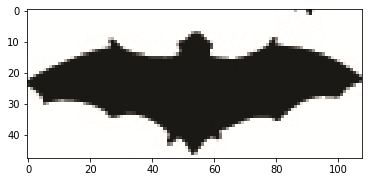

In [36]:
plt.imshow(animals[xb[0]-24:xb[0]+24, yb[0]-54:yb[0]+54])

## BONUS 
* now implement an extended version of the GHT that find rotated and scaled variants of the template. 
* find Italy (see "italy.jpg") and the map of Europe ("europe_map_political.gif")
* note that you can binarize your italy template by using a simple color lookup
* draw the location of italy on the map and print its scale and orientation (**BONUS**)

In [37]:
italy = io.imread('images/italy.jpg')
europe = io.imread('images/europe_map_political.gif')

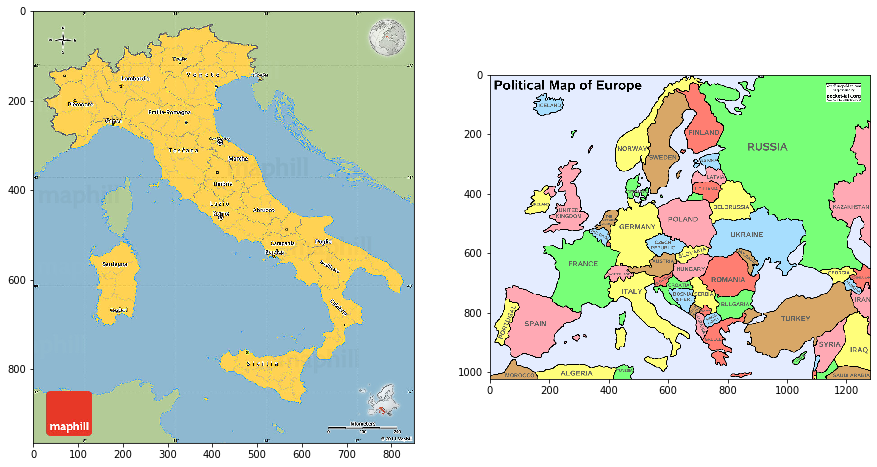

In [38]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.imshow(italy)
ax2.imshow(europe)

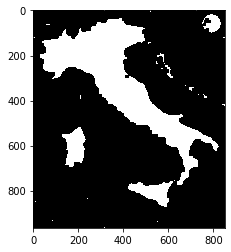

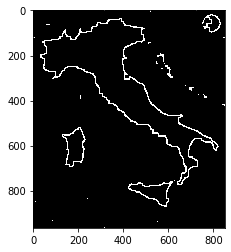

In [40]:
import cv2
hell_yellow = (255,255,204)
dark_yellow = (195,190,0)
binarized_italy = cv2.inRange(italy, dark_yellow, hell_yellow )
kernel = np.ones((3,3), np.uint8) 
binarized_italy = cv2.dilate(binarized_italy, kernel, iterations=4) 
binarized_italy = cv2.erode(binarized_italy, kernel, iterations=7) 
plt.imshow(binarized_italy,cmap='gray')
plt.show()
eroded_italy = cv2.erode(binarized_italy, kernel, iterations=5) 
italy_edge = binarized_italy - eroded_italy
plt.imshow(italy_edge,cmap='gray')
plt.show()

In [80]:
it_edge = italy_edge/255
it_center = centroid(it_edge)

In [67]:
it_go = gradient_orientation(color.rgb2gray(italy))

In [95]:
r_table = defaultdict(list)
for i in range(it_edge.shape[0]):
    for j in range(it_edge.shape[1]):
        if it_edge[i][j]:
            r_table[round(it_go[i,j])].append([round(it_center[0]-i), round(it_center[1]-j)])

In [98]:
europe_edge = feature.canny(color.rgb2gray(europe), 2)

In [99]:
europe_go = gradient_orientation(color.rgb2gray(europe))

In [122]:
xmax = europe_edge.shape[0]
ymax = europe_edge.shape[1]
a = np.zeros((4*xmax, 4*ymax))
at = np.zeros((3*xmax, 3*ymax))
ss = np.linspace(0, 2, 10)
for i in range(europe_edge.shape[0]):
    for j in range(europe_edge.shape[1]):
        if europe_edge[i][j] == True:
            phi = round(europe_go[i,j])
            for x, y in r_table[phi]:
                for s in range(0, 4):
                    for theta in range(360):
                        xcc = int(i - round((x*np.cos(math.radians(theta)) - y*np.sin(math.radians(theta)))*s))
                        ycc = int(j - round((x*np.sin(math.radians(theta)) + y*np.cos(math.radians(theta)))*s))
                        a[xmax+xcc, ymax+ycc] += 1
                        at[theta, s] += 1

KeyboardInterrupt: 